In [6]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import os
seaborn.set_context('talk')

In [37]:
with open('active_learning_data/dataset_names.txt') as f:
    names = f.readlines()
    names = [n[:-1] for n in names]
print(names)
print(len(names))

['antibacterial', 'anticancer', 'antifungal', 'antiHIV', 'antiMRSA', 'antiparasital', 'antiviral', 'hemolytic', 'soluble', 'shp2', 'tula2']
11


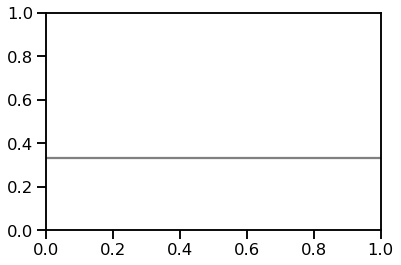

In [57]:
def plot_condition(ax, label, color, linestyle, location, trace=True, horizontal=False):
    # load lines
    avg = None
    for i in range(100):
        fn = '{}/{}_withheld_losses.txt'.format(location, str(i).zfill(4))
        if not os.path.exists(fn):
            break
        d = np.genfromtxt(fn)
        if avg is None:
            avg = d
        else:
            avg += d
        if trace:
            ax.plot(d, alpha=0.2, lw=0.5, color=color, linestyle=linestyle)        
    # should always go one past to get a break
    avg /= i
    if horizontal:
        ax.axhline(avg[-1], label=label, color=color, linestyle=linestyle)
    else:
        ax.plot(avg, alpha=0.9, lw=1.0, label=label, color=color, linestyle=linestyle)
plt.figure()
ax = plt.gca()
#plot_condition(ax, 'foo', 'C0', '-', 'reptile-weights/random/0/', trace=False)
plot_condition(ax, 'foo', 'gray', '-', 'models/all/0/', trace=False, horizontal=True)

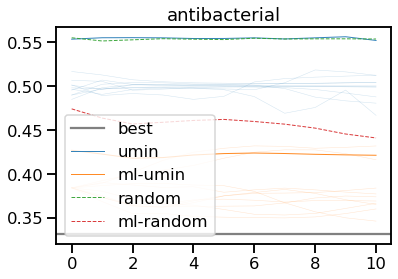

In [64]:
def plot_dataset(ax, ml_location, location, strategy, index, legend=False):
    ax.set_title(names[index])
    index = str(index)
    plot_condition(ax, 'best', 'gray', '-', os.path.join(location, 'all', index), trace=False, horizontal=True)
    plot_condition(ax, strategy, 'C0', '-', os.path.join(location, strategy, index), trace=True)
    plot_condition(ax, 'ml-' + strategy, 'C1', '-', os.path.join(ml_location, strategy, index), trace=True)
    
    plot_condition(ax, 'random', 'C2', '--', os.path.join(location, 'random', index), trace=False)
    plot_condition(ax, 'ml-random', 'C3', '--', os.path.join(ml_location, 'random', index), trace=False)
    

    
    if legend:
        ax.legend()
plt.figure()
ax = plt.gca()
plot_dataset(ax, 'reptile-weights', 'models', 'umin', 0, legend=True)

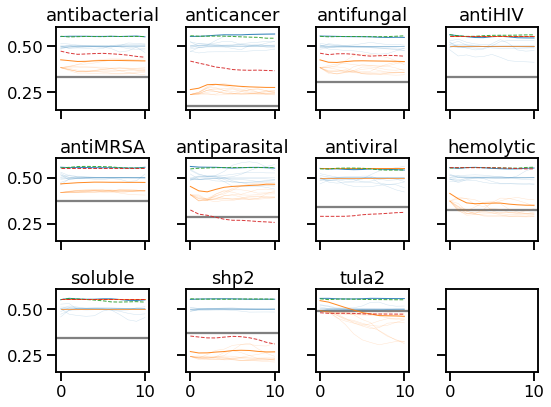

In [69]:
def plot_strategy(ml_location, location, strategy):
    fig, axs= plt.subplots(nrows=3, ncols=4, figsize=(8,6), sharex=True, sharey=True)
    for i in range(3):
        for j in range(4):
            k = i * 4 + j
            if k == len(names):
                break
            plot_dataset(axs[i,j], ml_location, location, strategy, k, k == len(names))
    plt.tight_layout()
    plt.show()
plot_strategy('reptile-weights', 'models', 'umin')